2-2. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

(1) 데이터 가져오기
터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
여기에서 데이터를 상세히 확인할 수 있습니다.


In [12]:
import pandas as pd
data = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : 링크 참조
pandas datetime extract year month day 키워드로 검색해 보기


In [14]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [15]:
data['datetime']=pd.to_datetime(data['datetime']) #to_datetime(inputs,format,erros)  ex)format='%Y-%m-%d %H:%M:%S', errors='raise'
data['year']=data['datetime'].dt.year
data['month']=data['datetime'].dt.month
data['day']=data['datetime'].dt.day
data['hour']=data['datetime'].dt.hour
data['min']=data['datetime'].dt.minute
data['sec']=data['datetime'].dt.second
data = data[['season', 'holiday', 'workingday', 'weather', 'temp',
             'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
            'month', 'day', 'hour', 'min', 'sec']]
data.head()

,season,holiday,workingday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,1,0,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,1,0,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,1,0,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,1,0,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,1,0,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기


<AxesSubplot:xlabel='sec', ylabel='count'>

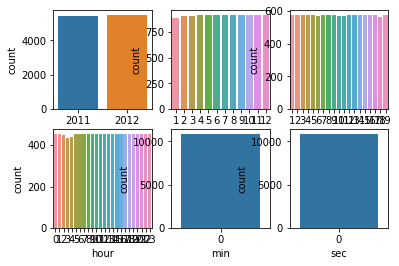

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
_, ax = plt.subplots(ncols=3, nrows=2)
sns.countplot(x='year',data=data, ax=ax[0,0])
sns.countplot(x='month',data=data, ax=ax[0,1])
sns.countplot(x='day',data=data, ax=ax[0,2])
sns.countplot(x='hour',data=data, ax=ax[1,0])
sns.countplot(x='min',data=data, ax=ax[1,1])
sns.countplot(x='sec',data=data, ax=ax[1,2])

(4) X, y 컬럼 선택 및 train/test 데이터 분리
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기


In [26]:
import numpy as np
y_data=data[['count']].to_numpy()
x_data=data[['holiday', 'workingday', 'weather', 'temp',
             'atemp', 'humidity', 'windspeed', 'year',
            'month', 'day', 'hour']].to_numpy()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

(5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기

In [44]:
predictions = model.predict(x_test)
print("예측값\n",predictions[:5])
print("실값\n",y_test[:5])
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("MSE valuse = {0}".format(mse))
print("RMSE valuse = {0}".format(mse**0.5))

예측값
 [[252.5830285 ]
 [ 48.96038463]
 [197.70049919]
 [294.11506613]
 [386.30946251]]
실값
 [[127]
 [ 13]
 [163]
 [233]
 [222]]
MSE valuse = 19785.761471738017
RMSE valuse = 140.6618692885105


(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

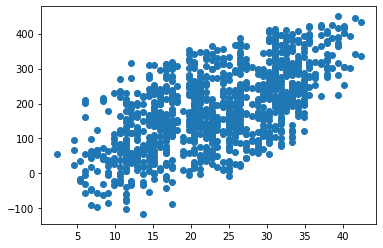

In [56]:
# x축 humidity  y축 count
plt.scatter(x_test[:,5],predictions)
#plt.scatter(x_test[:,5],y_test) #실값
plt.show()

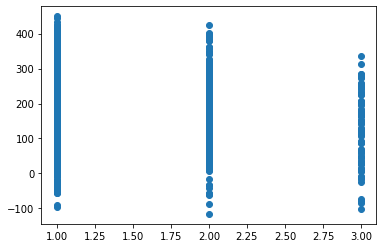

In [59]:
# x축 temp  y축 count
plt.scatter(x_test[:,3],predictions)
#plt.scatter(x_test[:,3],y_test)
plt.show()